In [2]:
import pandas as pd
import os

# Lista plików do wczytania
file_names = [f'{i:04}.parquet' for i in range(15)]

# Wczytanie i scalenie plików w jedną ramkę DataFrame
data_frames = [pd.read_parquet(file) for file in file_names]
df = pd.concat(data_frames, ignore_index=True)

# Analiza typów danych
print("Typy danych w ramce DataFrame:")
print(df.dtypes)

memory_usage = df.memory_usage(deep=True).sum()
print(f"Wielkość pamięci RAM zajmowanej przez ramkę DataFrame: {memory_usage / (1024 ** 3):.2f} GB")

Typy danych w ramce DataFrame:
sid                     int64
sid_profile             int64
post_id                object
profile_id              int64
date                   object
post_type               int64
description            object
likes                   int64
comments                int64
username               object
bio                    object
following               int64
followers               int64
num_posts               int64
is_business_account      bool
lang                   object
category               object
dtype: object
Wielkość pamięci RAM zajmowanej przez ramkę DataFrame: 19.51 GB


Typy danych w ramce DataFrame:
sid                     int64
sid_profile             int64
post_id                object
profile_id              int64
date                   object
post_type               int64
description            object
likes                   int64
comments                int64
username               object
bio                    object
following               int64
followers               int64
num_posts               int64
is_business_account      bool
lang                   object
category               object
dtype: object
Początkowa wielkość pamięci RAM zajmowanej przez ramkę DataFrame: 19.51 GB
Zoptymalizowana wielkość pamięci RAM zajmowanej przez ramkę DataFrame: 14.28 GB


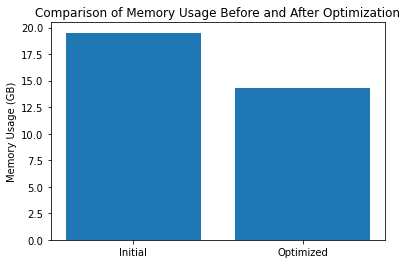

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Lista plików do wczytania
file_names = [f'{i:04}.parquet' for i in range(15)]

# Wczytanie i scalenie plików w jedną ramkę DataFrame
data_frames = [pd.read_parquet(file) for file in file_names]
df = pd.concat(data_frames, ignore_index=True)

# Analiza typów danych
print("Typy danych w ramce DataFrame:")
print(df.dtypes)

# Zmierz wielkość pamięci RAM zajmowanej przez ramkę DataFrame
initial_memory_usage = df.memory_usage(deep=True).sum()
print(f"Początkowa wielkość pamięci RAM zajmowanej przez ramkę DataFrame: {initial_memory_usage / (1024 ** 3):.2f} GB")

# Optymalizacja typów danych
def optimize_dataframe(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == 'object':
            num_unique_values = df[col].nunique()
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
        elif col_type == 'int64':
            df[col] = df[col].astype('int32')
        elif col_type == 'float64':
            df[col] = df[col].astype('float32')
    return df

df_optimized = optimize_dataframe(df)

# Zmierz wielkość pamięci RAM zajmowanej przez zoptymalizowaną ramkę DataFrame
optimized_memory_usage = df_optimized.memory_usage(deep=True).sum()
print(f"Zoptymalizowana wielkość pamięci RAM zajmowanej przez ramkę DataFrame: {optimized_memory_usage / (1024 ** 3):.2f} GB")

# Porównanie obu wielkości na wykresie
memory_usage_data = {
    'Initial': initial_memory_usage / (1024 ** 3),
    'Optimized': optimized_memory_usage / (1024 ** 3)
}

plt.bar(memory_usage_data.keys(), memory_usage_data.values())
plt.ylabel('Memory Usage (GB)')
plt.title('Comparison of Memory Usage Before and After Optimization')
plt.show()

In [ ]:
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

# Lista plików do wczytania
file_names = [f'{i:04}.parquet' for i in range(15)]

# Wczytanie i scalenie plików w jedną ramkę DataFrame
data_frames = [pd.read_parquet(file) for file in file_names]
df = pd.concat(data_frames, ignore_index=True)
print(df.columns)
# # Optymalizacja typów danych
# def optimize_dataframe(df):
#     for col in df.columns:
#         col_type = df[col].dtype
#         if col_type == 'object':
#             num_unique_values = df[col].nunique()
#             num_total_values = len(df[col])
#             if num_unique_values / num_total_values < 0.5:
#                 df[col] = df[col].astype('category')
#         elif col_type == 'int64':
#             df[col] = df[col].astype('int32')
#         elif col_type == 'float64':
#             df[col] = df[col].astype('float32')
#     return df

# df_optimized = optimize_dataframe(df)

# # Funkcja do mierzenia czasu operacji
# def measure_time(operation, df):
#     start_time = time.time()
#     operation(df)
#     end_time = time.time()
#     return end_time - start_time
# # Definicje operacji
# def group_and_aggregate(df):
#     return df.groupby('some_column').agg({'another_column': 'sum'})

# def filter_data(df):
#     return df[df['some_column'] > 100]

# def sort_data(df):
#     return df.sort_values(by='some_column')

# # Mierzenie czasu operacji na danych oryginalnych i zoptymalizowanych
# operations = [group_and_aggregate, filter_data, sort_data]
# operation_names = ['Group and Aggregate', 'Filter Data', 'Sort Data']

# original_times = []
# optimized_times = []

# for operation in operations:
#     original_times.append(measure_time(operation, df))
#     optimized_times.append(measure_time(operation, df_optimized))

# # Wyświetlanie czasów wykonania
# for name, original_time, optimized_time in zip(operation_names, original_times, optimized_times):
#     print(f"{name} - Original: {original_time:.4f} seconds, Optimized: {optimized_time:.4f} seconds")

# # Porównanie czasów wykonania na wykresie
# x = range(len(operation_names))
# plt.figure(figsize=(10, 6))
# plt.bar(x, original_times, width=0.4, label='Original', align='center')
# plt.bar(x, optimized_times, width=0.4, label='Optimized', align='edge')
# plt.xticks(x, operation_names)
# plt.ylabel('Time (seconds)')
# plt.title('Comparison of Operation Times on Original and Optimized DataFrames')
# plt.legend()
# plt.show()